## 11. Differential Equations

[Data Science Playlist on YouTube](https://www.youtube.com/watch?v=HReAo38LoM4&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy)
[![Python Data Science](https://apmonitor.com/che263/uploads/Begin_Python/DataScience11.png)](https://www.youtube.com/watch?v=HReAo38LoM4&list=PLLBUgWXdTBDg1Qgmwt4jKtVn9BWh5-zgy "Python Data Science")

Specific types of equations with differential terms arise from fundamental relationships such as conservation of mass, energy, and momentum. For example, the accumulation of mass $\frac{dm}{dt}$ in a control volume is equal to the mass inlet $\dot m_{in}$ minus mass outlet $\dot m_{out}$ from that volume.

$\frac{dm}{dt} = \dot m_{in} - \dot m_{out}$

Dynamic models can either be regressed (identified) from data or developed without data with fundamental relationships. Even fundamental relationships may have unknown or uncertain parameters. A combined approach for dynamic system modeling is to use fundamental physics-based relationships with data science. This approach uses the best features of both methods. It creates a model that aligns to measured values and extrapolates to regions where there is no or little data.

![exercise](https://apmonitor.com/che263/uploads/Begin_Python/exercise.png)

The first exercise is to [solve differential equations](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) with several examples using `odeint`. The same examples are also [solved with Gekko](https://apmonitor.com/pdc/index.php/Main/PythonDifferentialEquations). For simulation, the two give equivalent results but Gekko is built to use differential equations in optimization or combined with machine learning. The `odeint` function has a specific purpose to solve ODEs. The function `odeint` solves the differential equation requires 3 inputs.

    y = odeint(model, y0, t)

1. `model` Function name that returns derivative values at requested `y` and `t` values as `dydt = model(y,t)`
2. `y0` Initial conditions of the differential states
3. `t` Time points where the solution is reported 

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Solve Differential Equation

We solve the differential equation with initial condition $y(0) = 5$:

$ k \, \frac{dy}{dt} = -y$

where $k=10$. The solution of `y` is reported from an initial time `0` to final time `20` and with a plot of the result for $y(t)$ versus $t$. Notice how the equation is rearranged to return just the derivative value as `dydt = -(1.0/k) * y` from the function.

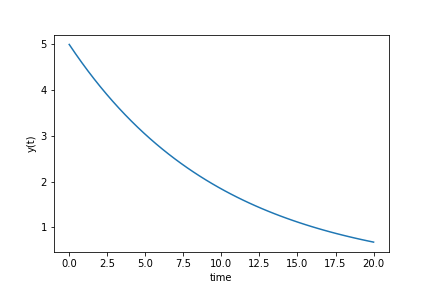

In [3]:
import numpy as np
from scipy.integrate import odeint

# function that returns dy/dt
def model(y,t):
    k = 10.0
    dydt = -(1.0/k) * y
    return dydt

y0 = 5                 # initial condition
t = np.linspace(0,20)  # time points
y = odeint(model,y0,t) # solve ODE

import matplotlib.pyplot as plt
%matplotlib widget
plt.plot(t,y)
plt.xlabel('time'); plt.ylabel('y(t)')
plt.show()

![gekko](https://apmonitor.com/che263/uploads/Begin_Python/gekko.png)

### Solve Differential Equation with Gekko

[Python Gekko](https://gekko.readthedocs.io/en/latest/) solves the same differential equation problem. Gekko is built for large-scale problems. [Additional tutorials on Gekko](https://apmonitor.com/wiki/index.php/Main/GekkoPythonOptimization) show how to solve other types of equations and optimization problems.

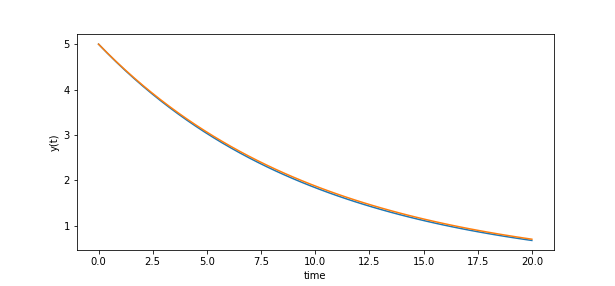

In [4]:
from gekko import GEKKO

m = GEKKO(remote=False)    # GEKKO model
m.time = np.linspace(0,20) # time points
y = m.Var(5.0); k = 10.0   # GEKKO variable and constant
m.Equation(k*y.dt()+y==0)  # GEKKO equation

m.options.IMODE = 4        # Dynamic simulation
m.solve(disp=False)        # Solve

plt.plot(m.time,y)
plt.xlabel('time'); plt.ylabel('y(t)')
plt.show()

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Differential Equation Activity

Solve the differential equation with initial condition $y(0) = 10$:

$ k \, \frac{dy}{dt} = -y$

Compare the five solutions of `y` from time `0` to `20` with `k=[1,2,5,10,20]`.

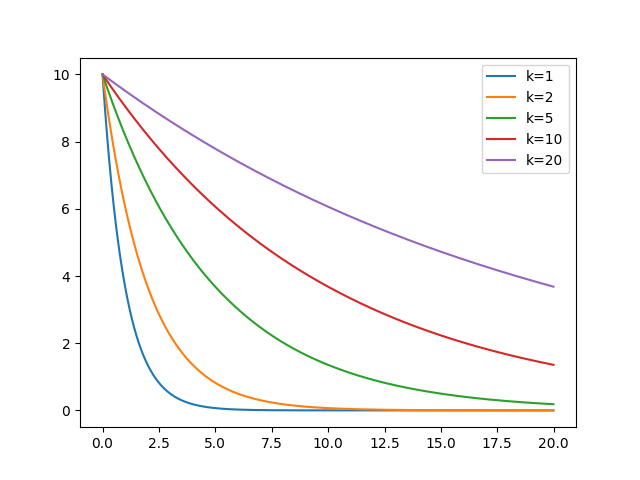

In [13]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

def f(t,y,k):
    return -y/k

tspan = (0,20)
teval = np.arange(0,20,.01)
y0 = np.array([10])
klist = [1,2,5,10,20]
sol = [solve_ivp(f,tspan,y0,t_eval=teval, args=(k,)) for k in klist]

plt.figure()
for i in range(5):
    plt.plot(sol[i].t, sol[i].y.flatten(), label=f"k={klist[i]}")

plt.legend()

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Symbolic Solution

Compact differential equation problems may have an analytic solution that can be expressed symbolically. A symbolic math package in Python is `sympy`. Sympy determines the analytic solution as $y(x)=C_1 \, \exp{\left(-\frac{x}{k}\right)}$. With the initial condition $y(0)=5$, the constant $C_1$ is equal to 5.

In [15]:
from IPython.display import display
import sympy as sym
from sympy.abc import x, k
y = sym.Function('y')
ans = sym.dsolve(sym.Derivative(y(x), x) + y(x)/k, y(x))
display(ans)

Eq(y(x), C1*exp(-x/k))

![idea](https://apmonitor.com/che263/uploads/Begin_Python/idea.png)

### Solve Differential Equation with Input `u`

Differential equations can also have an input (feature) that changes from an external source (exogenous input) such as actively changed by a measurement sensor, a person (manually), or selected by a computer.

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

Calculate the response `y(t)` when the input `u` changes from `0` to `2` at `t=5`.

$2 \frac{dy(t)}{dt} + y(t) = u(t)$

The initial condition is `y(0)=1` and the solution should be calculated until `t=15`. **Tip**: The expression `y(t)` does not mean `y` multiplied by `t`. It indicates that `y` changes with time and is written as a function of time. There are additional examples for [ODEINT](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) and [GEKKO](https://apmonitor.com/pdc/index.php/Main/PythonDifferentialEquations) if you need help.

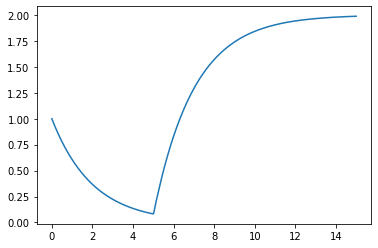

In [4]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def f(t,y):
    u = 0 if t < 5 else 2
    return (u - y)/2

tf = 15
y0 = np.array([1])
teval = np.arange(0,tf,.01)

sol = solve_ivp(f,(0,tf),y0,t_eval=teval)

plt.plot(sol.t, sol.y.T, label="Y")


### TCLab Activity

![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Data Collection

![connections](https://apmonitor.com/che263/uploads/Begin_Python/connections.png)

Turn on heater 1 to 100% and record $T_1$ every 5 seconds for 3 minutes. The data should include a total of 37 data points for each temperature sensor.

In [4]:
import numpy as np
import pandas as pd
import tclab
import time
# collect data for 3 minutes, every 5 sec
n = 37
tm = np.linspace(0,180,n)
t1s = np.empty(n); t2s = np.empty(n)
with tclab.TCLab() as lab:
    lab.Q1(100); lab.Q2(0)
    print('Time T1  T2')
    for i in range(n):
        t1s[i] = lab.T1; t2s[i] = lab.T2
        print(tm[i],t1s[i],t2s[i])
        time.sleep(5.0)
# put into dataframe
data = pd.DataFrame(np.column_stack((tm,t1s,t2s)),\
                    columns=['Time','T1','T2'])
data.to_csv('11-data.csv',index=False)

TCLab version 0.4.9
Arduino Leonardo connected on port COM7 at 115200 baud.
TCLab Firmware 2.0.1 Arduino Leonardo/Micro.
Time T1  T2
0.0 25.12 24.25
5.0 25.41 24.379
10.0 26.055 24.25
15.0 27.021 24.443
20.0 28.504 24.443
25.0 30.244 24.443
30.0 32.146 24.443
35.0 33.821 24.508
40.0 35.723 24.83
45.0 37.656 24.895
50.0 39.59 25.088
55.0 41.427 25.41
60.0 43.135 25.732
65.0 44.746 26.022
70.0 46.357 26.377
75.0 47.969 26.731
80.0 49.58 27.312
85.0 51.191 27.666
90.0 52.803 28.278
95.0 54.221 28.665
100.0 55.671 29.277
105.0 56.992 29.6
110.0 58.281 30.212
115.0 59.57 30.631
120.0 60.892 31.243
125.0 62.148 31.92
130.0 63.115 32.371
135.0 64.082 32.822
140.0 65.049 33.467
145.0 66.016 33.854
150.0 66.982 34.434
155.0 67.885 34.788
160.0 68.594 35.4
165.0 69.464 35.755
170.0 70.205 36.367
175.0 70.85 36.754
180.0 71.494 37.334
TCLab disconnected successfully.


![expert](https://apmonitor.com/che263/uploads/Begin_Python/expert.png)

### Solve Differential Equation

Use the parameters `a`, `b`, and `c` from [10. Solve Equations](https://github.com/APMonitor/data_science/blob/master/10.%20Solve_Equations.ipynb) or use the following default values.

| Parameter | Value |
|------|------|
| a    | 78.6 |
| b    | -50.3 |
| c    | -0.003677 |

Solve the ordinary differential equation (ODE) with these values.

$\frac{dT_1}{dt} = c (T_1-a)$

The initial condition for $T_1$ is $a + b$. Show the ODE solution at time points between the initial time `0` and the final time `180` sec. Plot the measured $T_1$ on the same plot as the ODE predicted temperature. Add appropriate labels to the plot.

In [10]:
data = pd.read_csv('11-data.csv')
data.head()

,Time,T1,T2
0,0.0,25.120,24.250
1,5.0,25.410,24.379
2,10.0,26.055,24.250
3,15.0,27.021,24.443
4,20.0,28.504,24.443


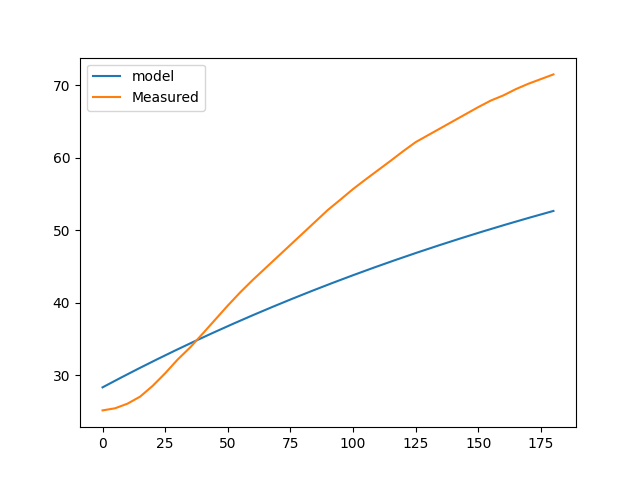

In [11]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

tm = data['Time']
t1s = data['T1']
def f(t,T):
    a = 78.6
    b = -50.3
    c = -.003677
    return c*(T - a)

T1_0 = np.array([78.6 + -50.3])
tf = 180

sol = solve_ivp(f, (0,tf), T1_0, t_eval=np.arange(0,tf,.01))

plt.plot(sol.t, sol.y.T, label="model")
plt.plot(tm ,t1s, label="Measured")
plt.legend()

looks like parameters from default are off. Oh well. 